In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm,datasets
import matplotlib.pyplot as plt

iris=datasets.load_iris()
print(iris.data[0:5])  # print first 5 rows
type(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


numpy.ndarray

In [17]:
print(iris.feature_names)
type(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


list

In [15]:
print(iris.target[0:5]) # print first 5 rows of the ndarray
type(iris.target)

[0 0 0 0 0]


numpy.ndarray

In [19]:
print(iris.target_names)
type(iris.target_names)

['setosa' 'versicolor' 'virginica']


numpy.ndarray

In [5]:
X=iris.data[:,:2]    # take the first two features
y=iris.target

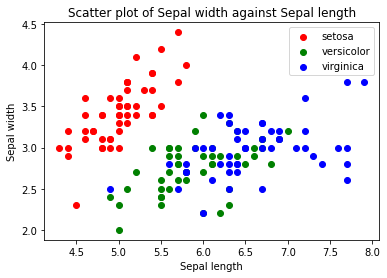

In [24]:
#---plot the points---
colors=['red','green','blue']
for color, i, target in zip(colors, [0,1,2], iris.target_names):
    #print(y==i)
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best',shadow=False, scatterpoints=1)

plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

In [58]:
C=1 # SVM regularization parameter
clf=svm.SVC(kernel='linear',C=C).fit(X,y)

Text(0.5, 1.0, 'SVC with linear kernel')

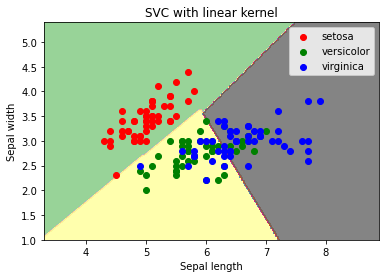

In [59]:
#---min and max for the first feature---
x_min, x_max=X[:,0].min()-1,X[:,0].max()+1

#---min and max for the second feature---
y_min, y_max=X[:,1].min()-1,X[:,1].max()+1

#---step size in the mesh---
h=(x_max/x_min)/100

#---make predictions for each of the points in xx,yy---
xx, yy=np.meshgrid(np.arange(x_min, x_max, h),
                  np.arange(y_min, y_max, h))

Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])

#---draw the result using a color plot---
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
colors=['red','green','blue']
for color, i, target in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best',shadow=False, scatterpoints=1)
plt.title("SVC with linear kernel")

### Making some predictions

In [50]:
predictions=clf.predict(X)
print(np.unique(predictions, return_counts=True))

(array([0, 1, 2]), array([50, 53, 47], dtype=int64))


### SVC with Radial Basis Function (RBF) Kernel

Text(0.5, 1.0, 'SVC with RBF kernel')

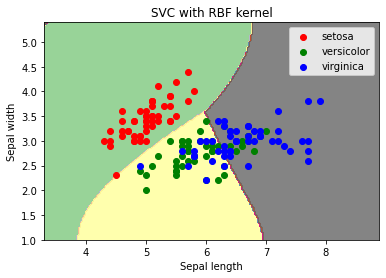

In [61]:
C=1
clf=svm.SVC(kernel='rbf',gamma='auto',C=C).fit(X,y)

#---min and max for the first feature---
x_min, x_max=X[:,0].min()-1,X[:,0].max()+1

#---min and max for the second feature---
y_min, y_max=X[:,1].min()-1,X[:,1].max()+1

#---step size in the mesh---
h=(x_max/x_min)/100

#---make predictions for each of the points in xx,yy---
xx, yy=np.meshgrid(np.arange(x_min, x_max, h),
                  np.arange(y_min, y_max, h))

Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])

#---draw the result using a color plot---
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
colors=['red','green','blue']
for color, i, target in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best',shadow=False, scatterpoints=1)
plt.title("SVC with RBF kernel")

### SVC with polynomial Kernel

Text(0.5, 1.0, 'SVC with polyonimal (degree=4) kernel')

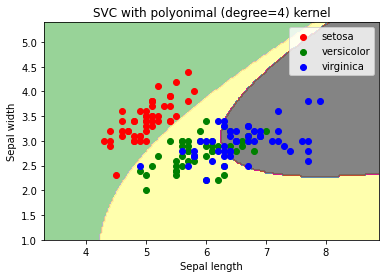

In [63]:
C=1 #SVM regularization parameter
clf=svm.SVC(kernel='poly',degree=4 ,C=C, gamma='auto').fit(X,y)

#---min and max for the first feature---
x_min, x_max=X[:,0].min()-1,X[:,0].max()+1

#---min and max for the second feature---
y_min, y_max=X[:,1].min()-1,X[:,1].max()+1

#---step size in the mesh---
h=(x_max/x_min)/100

#---make predictions for each of the points in xx,yy---
xx, yy=np.meshgrid(np.arange(x_min, x_max, h),
                  np.arange(y_min, y_max, h))

Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])

#---draw the result using a color plot---
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
colors=['red','green','blue']
for color, i, target in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best',shadow=False, scatterpoints=1)
plt.title("SVC with polyonimal (degree=4) kernel")